In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy import integrate as integral
import scipy.optimize as opt

In [16]:

def serial_beta(a1, b1, a2, b2):
    """
    Compute the parameters of the Beta distribution of Z = XY 
    where X and Y are independent Beta(a1, b1) and Beta(a2, b2) 
    random variables.
    """
    def fz_pdf(z):
        integrand = lambda x : beta.pdf(x, a2, b2) * beta.pdf(z/x, a1, b1) / x
        return integral.quad(integrand, z, 1)[0]
    
    
    def Obj_Fun(x) :
        integrand = lambda z : (fz_pdf(z) - beta.pdf(z, x[0], x[1])) ** 2
        return integral.quad(integrand, 0.001, 0.999)[0]
    
    x0 = [a1, b1]
    bnds = [(0, np.inf), (0, np.inf)]
    opts = dict(disp = False, maxiter = 1e4)
    res = opt.minimize(Obj_Fun, x0 = x0, 
        # method = 'L-BFGS-B',
        method = 'SLSQP',
        bounds = bnds,
        options = opts,
        tol = 1e-6)
    
    return res.x


In [17]:
a1, b1, a2, b2 = 9, 2, 8, 2
a_z, b_z = serial_beta(a1, b1, a2, b2)
# print the estimated parameters to decimal places
print(f'Estimated parameters for Z: a = {a_z:.2f}, b = {b_z:.2f}')

Estimated parameters for Z: a = 7.62, b = 4.02


Estimated parameters for Z: a = 7.64, b = 4.03
Estimated parameters for Z: a = 7.65, b = 4.03


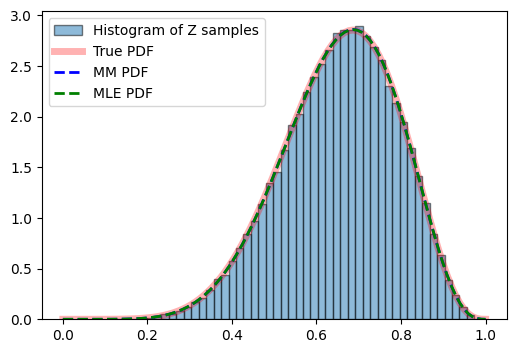

In [106]:
# use random numbers to fit beta parameters

a1, b1, a2, b2 = 9, 2, 8, 2

N = 100000
x = beta.rvs(a1, b1, size=N)
y = beta.rvs(a2, b2, size=N)
z = x * y
a_z_fit, b_z_fit, loc, scale = beta.fit(z, method ='mle',floc=0, fscale=1)  # fix loc and scale
print(f'Estimated parameters for Z: a = {a_z_fit:.2f}, b = {b_z_fit:.2f}')

# use method of moments to fit beta parameters
a_z_mom, b_z_mom, loc, scale = beta.fit(z, method='mm', floc=0, fscale=1)
print(f'Estimated parameters for Z: a = {a_z_mom:.2f}, b = {b_z_mom:.2f}')

fig = plt.figure(figsize=(6, 4))
plt.hist(z, bins=50, density=True, edgecolor='k', alpha=0.5, label='Histogram of Z samples')
z_vals = np.linspace(0, 1, 100)
pdf_z = beta.pdf(z_vals, a_z, b_z)
pdf_z_mom = beta.pdf(z_vals, a_z_mom, b_z_mom)
pdf_z_fit = beta.pdf(z_vals, a_z_fit, b_z_fit)
plt.plot(z_vals, pdf_z, 'r', lw=5, alpha=0.3, label='True PDF')
plt.plot(z_vals, pdf_z_mom, 'b--', lw=2, label='MM PDF')
plt.plot(z_vals, pdf_z_fit, 'g--', lw=2, label='MLE PDF')
plt.legend(loc='best')
plt.show()

In [98]:
# write a def function to fit beta parameters using method of moments
def sampling_serial_beta(a1, b1, a2, b2, N=100000, method='mm'):
    x = beta.rvs(a1, b1, size=N)
    y = beta.rvs(a2, b2, size=N)
    z = x * y
    a, b, loc, scale = beta.fit(z, method=method, floc=0, fscale=1)
    return a, b

In [101]:
a1, b1, a2, b2 = 9, 2, 8, 2
N = 100000
method = 'mm'
a_z_samp, b_z_samp = sampling_serial_beta(a1, b1, a2, b2, N=N, method=method)
print(f'Estimated parameters for Z by {method}: a = {a_z_samp:.2f}, b = {b_z_samp:.2f}')

Estimated parameters for Z by mm: a = 7.62, b = 4.02
